In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import warnings
warnings.filterwarnings('ignore')

In [3]:
tips = sbn.load_dataset('tips')

In [9]:
print(tips.info()) #Dùng lệnh print để hiện thị được cả hai cái đồng thời trong cùng 1 cell, tránh cái sau đè lên cái trước
print()
print(tips.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


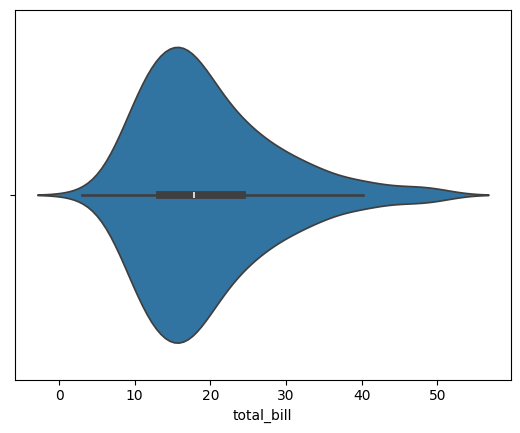

In [14]:
#Vẽ violinplot cho total_bill
sbn.violinplot(data=tips, x='total_bill'); #Để  x='total_bill' để  nó vẽ nằm ngang

'''
Chạy tips.total_bill.describe() để  nó ra những thông số cơ bản, lấy đó làm nhận xét

Có 244 quan sát
Trung bình total_bill là 19.79
Trung vị total_bill là 17.80
Có ít nhất 25% quan sát bé hơn 13.35
Có ít nhất 75% quan sát bé hơn 24.13
Có 50% quan sát nằm trong khoảng 13.35 - 24.13
'''

In [15]:
tips.total_bill.describe()

count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64

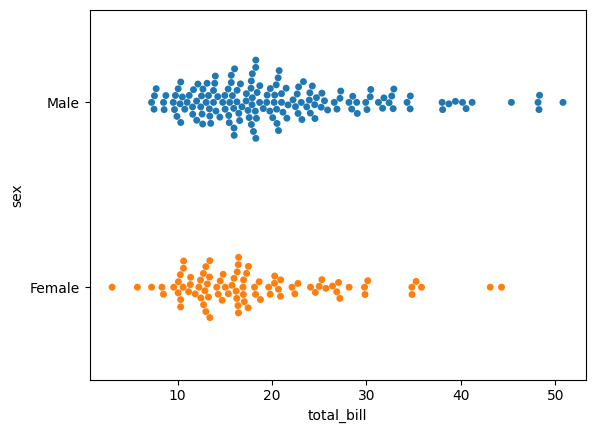

In [21]:
#Vẽ swarmplot cho total_bill theo sex
sbn.swarmplot(data=tips, x='total_bill',y='sex', hue='sex');

#Hoặc sbn.swarmplot(data=tips, y='total_bill',x='sex', hue='sex'); để  vẽ theo chiều dọc

'''
Nhận xét:

+Số lượng thực khách nam nhiều hơn nữ
+Số tiền total_bill thực khách nam trả nhiều hơn nữ
'''

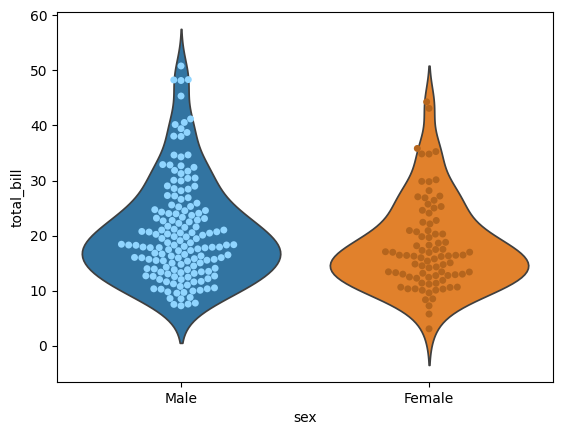

In [44]:
#Vẽ swarmplot chồng lên violinplot để thấy được nhiều thứ hơn
sbn.violinplot(data=tips, x='sex', y='total_bill', hue='sex', inner=None) #Đặt inner=None để  không hiển thị hộp boxplot bên trong violinplot
sbn.swarmplot(data=tips,x='sex', y='total_bill', hue='sex', palette={'Male':'#90D5FF', 'Female':'#B5651D'});
#Dùng palette để  chỉ định màu cho những gì được phân loại theo hue
#  chỉ định màu #90D5FF cho Male và màu #B5651D cho Female trong swarmplot

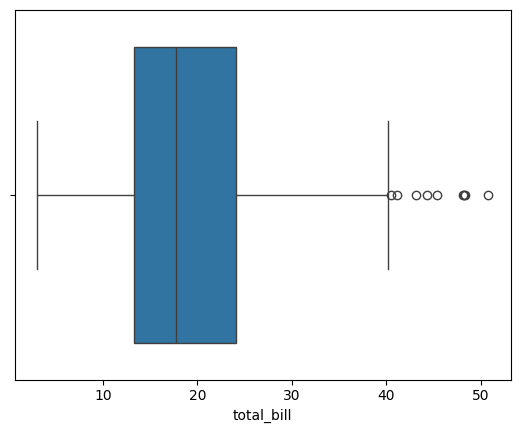

In [33]:
#Vẽ boxplot cho cột total_bill
sbn.boxplot(data=tips, x='total_bill');

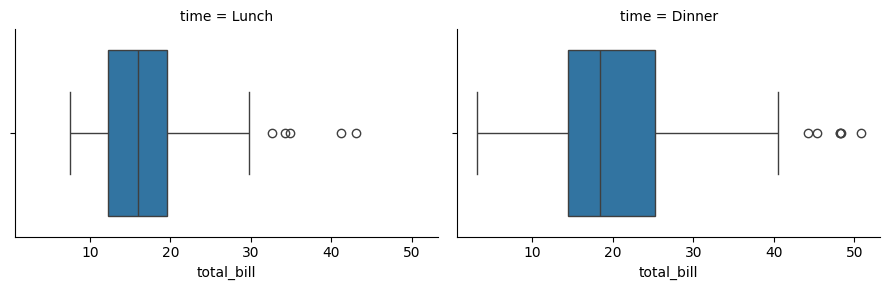

In [42]:
#Tạo facetGrid cho total_bill theo time, và chỉ định thứ tự các cột bằng col_order
gr1 = sbn.FacetGrid(data=tips, col='time', col_order=['Lunch','Dinner'], height=3, aspect=1.5)
gr1.map(sbn.boxplot, 'total_bill');

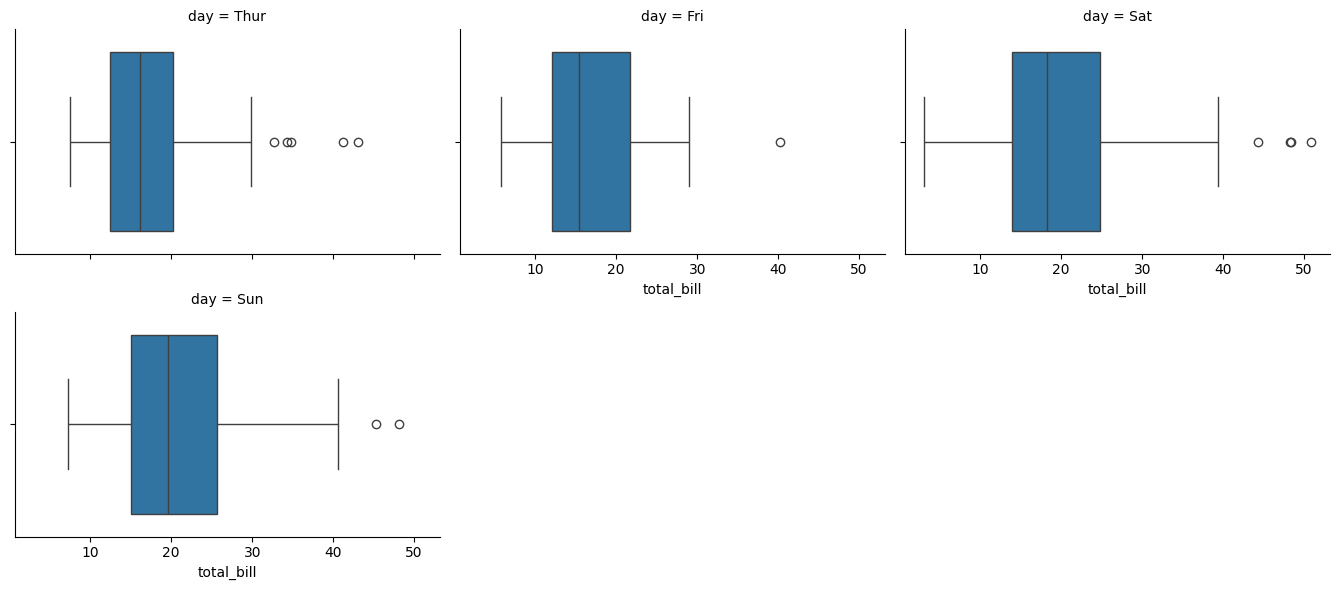

In [53]:
gr2 = sbn.FacetGrid(data=tips, col='day', height=3, aspect=1.5, col_wrap=3)
#Dùng col_wrap=3 để chỉ định cho nó mỗi hàng chỉ xuất hiện 3 cột, đến thứ 4 thì phải xuống hàng mới

gr2.map(sbn.boxplot, 'total_bill');

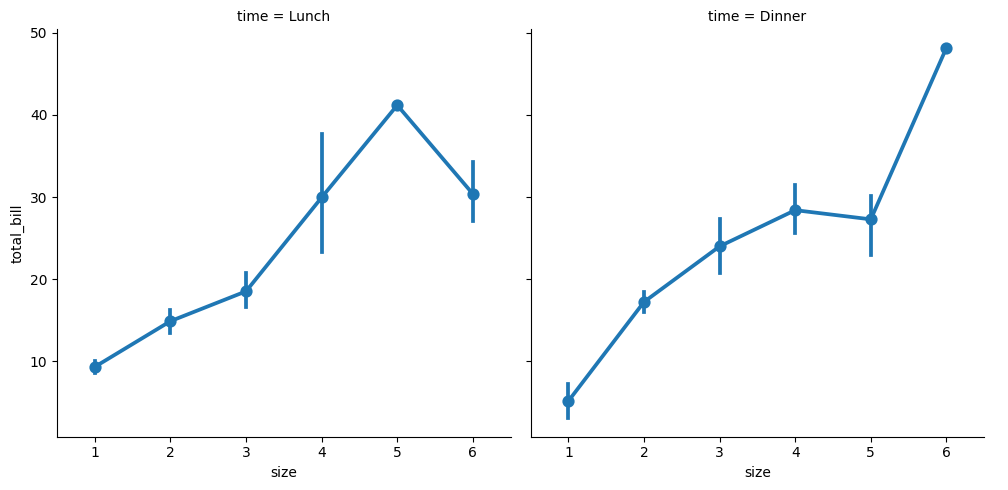

In [60]:
#Tạo catplot chứa pointplot của giá trị total_bill(Y) thay đổi theo size(X) và tách dòng theo time

sbn.catplot(data=tips, x='size', y='total_bill', kind='point', col='time');
#col='time' để  tách thành hai biểu đồ trên hai cột khác nhau theo time

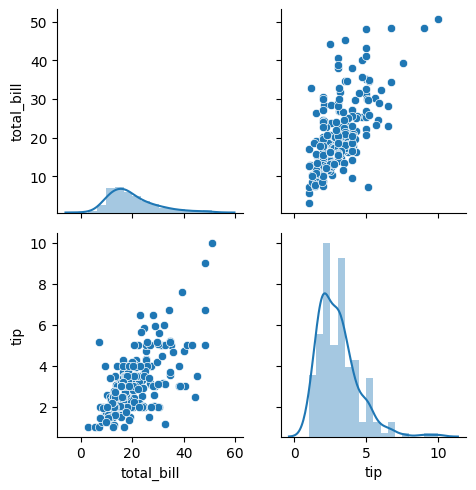

In [64]:
#Tạo PairGrid với scatterplot thể hiện tương quan giữa total_bill và tip
gr3 = sbn.PairGrid(data=tips, vars=['total_bill', 'tip'])
gr3.map_diag(sbn.distplot)
gr3.map_offdiag(sbn.scatterplot);

#hoặc gr3.map_offdiag(sbn.regplot); để  hiện ra đường tuyến tính

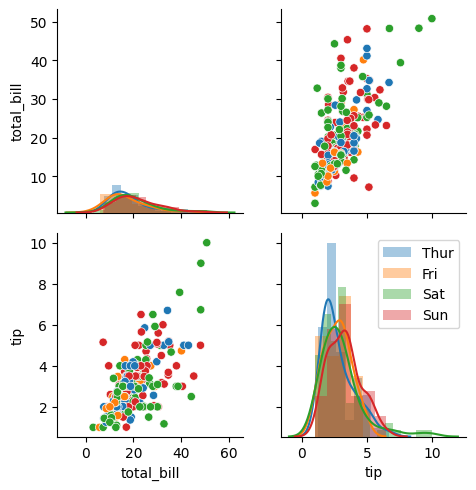

In [69]:
#Tạo PairGrid với scatterplot thể hiện tương quan giữa total_bill và tip, với palette color là 'day'
gr4 = sbn.PairGrid(data=tips, vars=['total_bill', 'tip'], hue='day')
gr4.map_diag(sbn.distplot)
gr4.map_offdiag(sbn.scatterplot)
plt.legend();

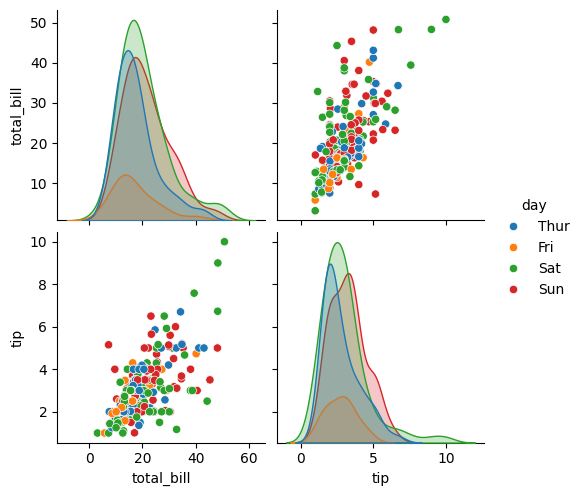

In [68]:
#Hoặc bằng cách dùng pairplot
sbn.pairplot(data=tips, vars=['total_bill', 'tip'], kind='scatter', hue='day');